In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
player_list = df.player_id.unique().tolist()

In [45]:
# Utility functions
def get_winning_rate(df, player):
    '''calculate the winning rate of the specified player'''
    df_player = df[df.player_id == player]
    df_player_win = df_player[df_player.player_win_lose == 'win']
    winning_rate = len(df_player_win) / len(df_player)
    return winning_rate

def get_n_games(df, player):
    '''calculate the number of games played by the specified player'''
    df_player = df[df.player_id == player]
    return len(df_player)

def get_dealer_winning_rate_at_n_decks(df, n_decks):
    '''calculate the dealer's winning rate of the specified n_decks'''
    df_n_decks = df[df.n_decks == n_decks]
    if len(df_n_decks) > 0:
        df_selected = df[(df.n_decks == n_decks) & (df.dealer_win_lose == 'win')]
        winning_rate = df_selected.game_id.nunique() / df_n_decks.game_id.nunique()
        return winning_rate
    else:
        return 'na'


In [54]:
n_decks_list = list(range(3, df.n_decks.max()+1))
# n_decks
dealer_winning_rates = []
for n_decks in n_decks_list:
    dealer_winning_rates.append(get_dealer_winning_rate_at_n_decks(df, n_decks))

In [55]:
dealer_winning_rates

[0.4, 0.42105263157894735, 0.42857142857142855, 0.42857142857142855, 0.75]

<AxesSubplot:>

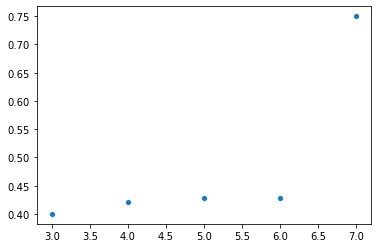

In [56]:
sns.scatterplot(n_decks_list, dealer_winning_rates)